# Import all important librabries


In [2]:
import pandas as pd
import numpy as np
import json
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read Datasets

In [16]:
train_data = pd.read_csv("train.csv",delimiter=',')
test_data = pd.read_csv('test.csv',delimiter=',')
train_data.shape
train_data.describe()
train_data.isnull().sum()

Review Text     0
Review Title    0
topic           0
dtype: int64

###### Calculate count of each topic

In [13]:
topic_list = train_data['topic'].tolist()
topic_list = nltk.FreqDist(topic_list)
topic_df = pd.DataFrame({'topic':list(topic_list.keys()),
                        'count':list(topic_list.values())})
topic_df

,topic,count
0,Shipment and delivery,390
1,Not Effective,611
2,Customer Service,239
3,Allergic,567
4,Texture,410
5,Quality/Contaminated,715
6,Color and texture,234
7,Bad Taste/Flavor,1194
8,Too big to swallow,228
9,Smells Bad,123


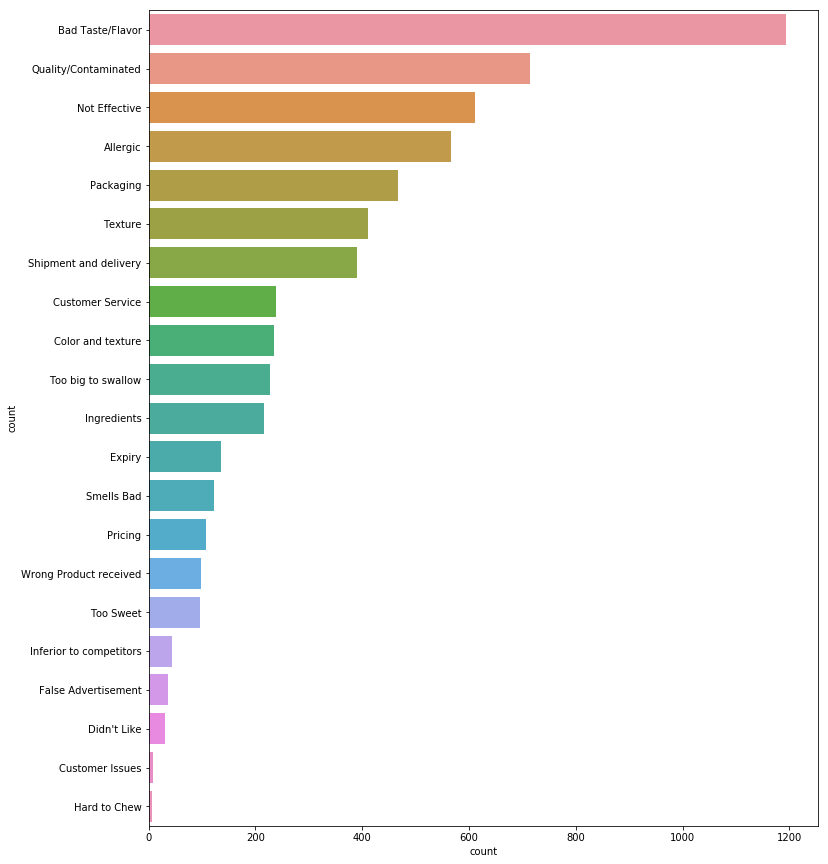

In [14]:
#view this in graphical format
gr = topic_df.nlargest(columns="count",n=len(set(topic_list)))
plt.figure(figsize=(12,15))
ax = sns.barplot(data=gr,x="count",y="topic")
ax.set(ylabel='count')
plt.show()

###### split data into train and test

In [56]:
X_train,X_test, y_train,y_test = train_test_split(train_data.iloc[:,0],train_data.iloc[:,-1], test_size=0.2,random_state=9)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4767,), (1192,), (4767,), (1192,))


# Extracting features from text

Reviews contains series of words. To run machine learning algorithm we need to convert text into numerical feature vectors.

We are going to segment each reviews into words and then count number of time each word occurs in data and finally assign each word an integer id. Ths is known as feature vector.

Scikit-learn has a component to create feature vector ie. "CountVectorizer"

Just by counting number of words in the dataset will give more weightage to common words. To avoid that I am using TF-IDF.

TF-IDF(Term frequency inversr document frequency): is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling

# Run Machine learning algorithms using pipeline

I am going with Naive bayes, SVM and Logistic regression algorithms and at the end will use for test data whose accuracy is more

In [33]:
##Pipeline for NB algorithm
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
])

In [34]:
text_clf = text_clf.fit(X_train,y_train)
predicted = text_clf.predict(X_test)

In [35]:
#check result
print ("nb result",np.mean(predicted == y_test))

nb result 0.3959731543624161


In [41]:
##Pipeline for SVM algorithm with parameters
text_clf_svm = Pipeline([('vect', CountVectorizer(stop_words='english')),
                      ('tfidf', TfidfTransformer()),
                      ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-3, n_iter=5, random_state=42)),
 ])

In [42]:
test_clf_svm= text_clf_svm.fit(X_train, y_train)
predicted_svm = text_clf_svm.predict(X_test)

c:\pyhton36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [43]:
print ("svm result",np.mean(predicted_svm == y_test))

svm result 0.4161073825503356


In [44]:
## Pipeline for Logistice regression
text_clf_lg = Pipeline([('vect', CountVectorizer(stop_words='english')),
                      ('tfidf', TfidfTransformer()),
                      ('clf-svm', LogisticRegression()),
 ])

In [45]:
test_clf_lg= text_clf_lg.fit(X_train, y_train)
predicted_lg = text_clf_lg.predict(X_test)

c:\pyhton36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\pyhton36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [46]:
print ("Logistic result",np.mean(predicted_lg == y_test))

Logistic result 0.4261744966442953


Logistinc regression's accuracy is more I will use Logistic regression algorithm for test data prediction.

In [57]:
Final_result = text_clf_lg.fit(train_data.iloc[:,0], train_data.iloc[:,-1])
predict_result = Final_result.predict(test_data.iloc[:,0])

In [58]:
result_df = pd.DataFrame({'Review Text':test_data.iloc[:,0],
                          'Review Title':test_data.iloc[:,-1],
                          'topic':predict_result}
)
result_df.to_csv('Submission.csv')

In [59]:
result_df


,Review Text,Review Title,topic
0,I use chia seed in my protein shakes. These ta...,Bad tast,Bad Taste/Flavor
1,I use chia seed in my protein shakes. These ta...,Bad tast,Bad Taste/Flavor
2,Don’t waste your money.,No change. No results.,Not Effective
3,I use the book 'Fortify Your Life' by Tieraona...,"Good Vegan Choice, Poor Non Vegan Choice",Ingredients
4,I use the book 'Fortify Your Life' by Tieraona...,"Good Vegan Choice, Poor Non Vegan Choice",Ingredients
5,I used to be loyal customer to this brand. I h...,SMELL HORRIBLE!,Quality/Contaminated
6,I used to be loyal customer to this brand. I h...,SMELL HORRIBLE!,Quality/Contaminated
7,I used to be loyal customer to this brand. I h...,SMELL HORRIBLE!,Quality/Contaminated
8,I used to be loyal customer to this brand. I h...,SMELL HORRIBLE!,Quality/Contaminated
9,I haven’t received it yet.,Shipping,Shipment and delivery


###### We can increase accuracy of model by tunnig parameters using GridsearchCV. 

##### Other methods:
    Deep learning- Models with pretrained Embdedings
    Rasa NLU - Use Rasa NLU's intent classification 